Final VGG-16

In [ ]:
from google.colab import drive
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def vgg16_model():
  base_model = keras.applications.VGG16(
    weights='imagenet',  
    input_shape=(256, 256, 3),
    include_top=False)
  base_model.trainable = False
  inputs = keras.Input(shape=(256, 256, 3))
  x = base_model(inputs, training=False)
  x = keras.layers.GlobalAveragePooling2D()(x)
  outputs = keras.layers.Dense(3)(x)
  model = keras.Model(inputs, outputs)
  model.summary()
  model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[keras.metrics.CategoricalAccuracy()])
  return model 


In [ ]:
model = vgg16_model()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d_5   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 14,716,227
Trainable params: 1,539
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
def load_data(ROOT_DIR,IMAGE_SIZE,BATCH_SIZE):
  # load and iterate training dataset
  datagen_train = ImageDataGenerator( rescale = 1./255)  
  datagen_valid = ImageDataGenerator(rescale = 1./255)
  datagen_test = ImageDataGenerator(rescale = 1./255)
  train_it = datagen_train.flow_from_directory(
      ROOT_DIR+"/train",
      target_size=(IMAGE_SIZE, IMAGE_SIZE),
      color_mode="rgb",
      class_mode="categorical",
      batch_size=BATCH_SIZE,
  )

  # load and iterate validation dataset
  valid_it = datagen_valid.flow_from_directory(
      ROOT_DIR+"/val",
      target_size=(IMAGE_SIZE, IMAGE_SIZE),
      color_mode="rgb",
      class_mode="categorical",
      batch_size=BATCH_SIZE,
  )
  test_it = datagen_test.flow_from_directory(
      ROOT_DIR+"/test",
      target_size=(IMAGE_SIZE, IMAGE_SIZE),
      color_mode="rgb",
      class_mode="categorical",
      batch_size=BATCH_SIZE,
  )
  return train_it, valid_it, test_it


In [ ]:
train_it, valid_it, test_it = load_data("/content/drive/MyDrive/PrivateData_train_test_val",256,64)

Found 2047 images belonging to 3 classes.
Found 585 images belonging to 3 classes.
Found 293 images belonging to 3 classes.


In [ ]:
len(train_it)

32

In [ ]:
BATCH_SIZE= 64
EPOCHS = 5
STEPS_PER_EPOCH = int(2047   / 64)
VAL_STEPS = int(293    / 64)


In [ ]:
train_it.n // train_it.batch_size

31

In [ ]:
model.fit(train_it,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=valid_it,
          shuffle=True,
          initial_epoch=0,
          steps_per_epoch=STEPS_PER_EPOCH,
          validation_steps=VAL_STEPS,
          validation_batch_size=BATCH_SIZE,
          )

Epoch 1/5
31/31 [==============================] - 252s 8s/step - loss: 0.8404 - categorical_accuracy: 0.8306 - val_loss: 0.7687 - val_categorical_accuracy: 0.8711
Epoch 2/5
31/31 [==============================] - 132s 4s/step - loss: 0.7361 - categorical_accuracy: 0.8533 - val_loss: 0.6766 - val_categorical_accuracy: 0.8633
Epoch 3/5
31/31 [==============================] - 67s 2s/step - loss: 0.6509 - categorical_accuracy: 0.8603 - val_loss: 0.5935 - val_categorical_accuracy: 0.8984
Epoch 4/5
31/31 [==============================] - 40s 1s/step - loss: 0.5841 - categorical_accuracy: 0.8729 - val_loss: 0.5187 - val_categorical_accuracy: 0.8906
Epoch 5/5
31/31 [==============================] - 31s 1s/step - loss: 0.5308 - categorical_accuracy: 0.8719 - val_loss: 0.5155 - val_categorical_accuracy: 0.8594


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input



In [ ]:
def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(256, 256))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,256,256,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

In [ ]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  
    input_shape=(224, 224, 3),
    include_top=False)

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
base_model.trainable = False

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)

outputs = keras.layers.Dense(3)(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 14,716,227
Trainable params: 1,539
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[keras.metrics.CategoricalAccuracy()])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator()  


datagen_valid = ImageDataGenerator()

In [ ]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    "/content/drive/MyDrive/_train_test_val/train",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
)

# load and iterate validation dataset
valid_it = datagen_valid.flow_from_directory(
    "/content/drive/MyDrive/_train_test_val/val",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
)

Found 2052 images belonging to 3 classes.
Found 598 images belonging to 3 classes.


In [ ]:
from tensorflow import keras


In [ ]:
/

()

In [ ]:
train_it = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/PrivateData_train_test_val/train',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))
valid_it = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/PrivateData_train_test_val/val',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

Found 2047 files belonging to 3 classes.
Found 585 files belonging to 3 classes.


AttributeError: ignored

In [ ]:
from tensorflow.keras import models, layers
import tensorflow as tf

In [ ]:
rescale_layer = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
steps_per_epoch = int(1506  / 32)
val_steps = int(430 / 32)

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.callbacks.EarlyStopping(
    monitor="val_categorical_accuracy",
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model.fit(train_it,
            batch_size=32,
            epochs=50,
            verbose=1,
            #callbacks=tf.keras.callbacks.EarlyStopping(),
            validation_data=valid_it,
            shuffle=True,
            initial_epoch=0,
            steps_per_epoch=steps_per_epoch,
            validation_steps=val_steps,
            validation_batch_size=32,
            )

Epoch 1/50
47/47 [==============================] - 14s 288ms/step - loss: 0.5077 - categorical_accuracy: 0.8569 - val_loss: 0.4837 - val_categorical_accuracy: 0.8798
Epoch 2/50
47/47 [==============================] - 13s 275ms/step - loss: 0.4696 - categorical_accuracy: 0.8616 - val_loss: 0.4405 - val_categorical_accuracy: 0.8798
Epoch 3/50
47/47 [==============================] - 13s 271ms/step - loss: 0.4337 - categorical_accuracy: 0.8697 - val_loss: 0.4289 - val_categorical_accuracy: 0.8654
Epoch 4/50
47/47 [==============================] - 13s 269ms/step - loss: 0.4089 - categorical_accuracy: 0.8677 - val_loss: 0.3926 - val_categorical_accuracy: 0.8798
Epoch 5/50
47/47 [==============================] - 13s 268ms/step - loss: 0.3865 - categorical_accuracy: 0.8799 - val_loss: 0.3695 - val_categorical_accuracy: 0.8822
Epoch 6/50
47/47 [==============================] - 13s 266ms/step - loss: 0.3647 - categorical_accuracy: 0.8867 - val_loss: 0.3646 - val_categorical_accuracy: 0.875

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(256, 256))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,256,256,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

1/1 [==============================] - 1s 662ms/step


array([[ -6.343912,  26.847456, -51.284878]], dtype=float32)

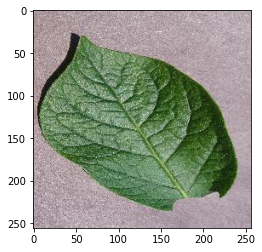

In [ ]:
make_predictions('/content/drive/MyDrive/dataset/_train_test_val/val/Healthy/163ada72-4288-4f85-a3c1-feed23c8d1de___RS_HL 1940.JPG')

1/1 [==============================] - 0s 16ms/step


array([[  75.5113  ,  -69.9333  , -100.019485]], dtype=float32)

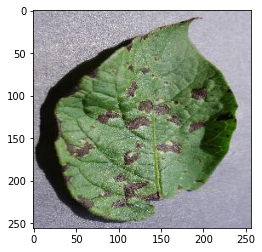

In [ ]:
make_predictions('/content/drive/MyDrive/dataset/_train_test_val/val/Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG')

1/1 [==============================] - 0s 17ms/step


array([[ 46.47788 , -85.009926, -62.338528]], dtype=float32)

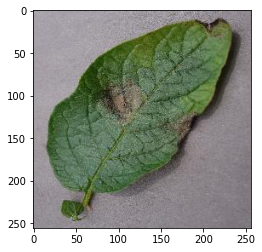

In [ ]:
make_predictions('/content/drive/MyDrive/dataset/_train_test_val/val/Late_blight/006cc01a-1888-4326-9b62-a65cb55a6377___RS_LB 5207.JPG')
